$\int_{0}^{1} e^{x/5}dx$

In [20]:
format long, I=5*exp(1/5)-5

I =  1.107013790800849


In [21]:
ints=integral(@(x) exp(x/5),0,1)

ints =  1.107013790800849


In [22]:
I-ints

ans =    4.440892098500626e-16


$\int_{0}^{1} e^{sin(x)}dx= ????$

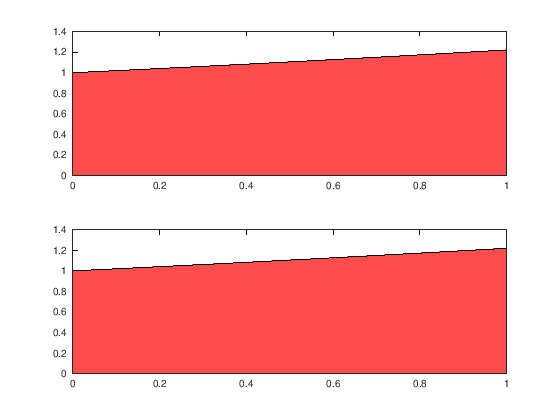

In [23]:
x=linspace(0,1,200)';
subplot(2,1,1), fill([x;1;0],[exp(x/5);0;0],[1,0.3,0.3])
subplot(2,1,2), fill([x;1;0],[exp(sin(x/5));0;0],[1,0.3,0.3])

Like in finite differences we may just look at the data points as nodes, if we assume equally spaced ones then we have:
 
 $t_{i}=a+ih$
 $h=\frac{b-a}{n}$
 $i=0,...,n$
 
 The we may express  the integration as 
 

\begin{equation}
I=\int_{a}^{b} f(x)dx \approx Q = h \sum_{i=0}^{n} \omega_{i} f(t_{i})=h\left( w_0 f(t_0) +w_1 f(t_1)+ .... +w_n f(t_n) \right)
\end{equation}
 
 
 As with finite difference formulas the weights are independent of the functionbeing integrated. One way to derive integration formulas is to take the same approach taken for finite differences, meaning we find an interpolant and then operate on it. If we use a piecewise polynomial as an interpolant the result is [Newton-cotes formulas](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas)

 

# The trapezoid:

One of the most important routines for numerical integration is the so called trapezoid formula, wic is just Newtown-Cotes for a piecewise linear interpolant. Using the basis for this interpolant (the Hat functions one may write)

\begin{equation}
I \approx \int_{a}^{b} \sum_{i=0}^{n} h f(t_{i}) H_{i}(x) dx
\end{equation}

The weights of the quadrature in this case are simply given by:

$w_{i}=h^{-1} \int_{a}^{b} H_{i}(x)dx$

**Remember that the Hat functions are given by:**

\begin{equation}
H_{k}(x)=\begin{cases} 
      \frac{x-t_{k-1}}{t_{k}-t_{k-1}} & x \in [t_{k-1},t_{k}] \\
      \frac{t_{k+1}-x}{t_{k+1}-t_{k}} & x \in [t_{k},t_{k+1}] \\
      0 & otherwise 
   \end{cases}
\end{equation}

In [24]:
function H=hatfun(x,t,k)
%HATFUN the piecewise linear basis function.
% Input:
% x the evaluation points
% the nodes (data points)
%k node index
%Output: values of the kth hat function
n=size(t)(1)-1;
k=k+1; % so we start counting from one 
%We define a fake node for dealing with the first and last funcs H_{0},H_{n}
t=[2*t(1) .- t(2);t(:);2*t(n+1) .- t(n)];
k=k+1;% adjust index for this ficticius node

H1=(x .- t(k-1))/(t(k) .- t(k-1)); %upward slope
H2=(t(k+1) .- x)/(t(k+1) .- t(k)); %downword

H=min(H1,H2);
H=max(0,H);
end

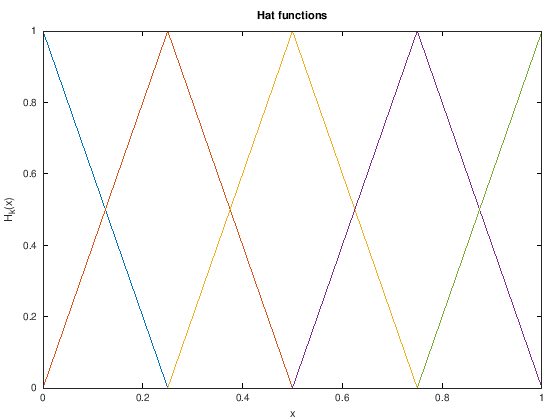

In [25]:
t=[0 0.25 0.5 0.75 1]';
x=linspace(0,1,1000);
for k=0:4
    y=hatfun(x,t,k);
    plot(x, y)
    hold on
end
xlabel('x')
ylabel('H_{k}(x)')
title('Hat functions')

 From computing the area of a triangle we can see that the weights are simply
 
 \begin{equation}
 w_{i}= \begin{cases} 
      1 &  i=1,....,n-1 \\
      \frac{1}{2}&  i=0,n \\
   \end{cases}
 \end{equation}
 
 So we may finally write the trapezoid rule formula as:
 
 $I\approx h \left( \frac{1}{2} f(t_{0}) + f(t_{1}) + .... +\frac{f(t_{n})}{2}\right)=T_{f}(n)$

In [26]:
function [T,t,y]=trapezoid(f,a,b,n)
% Trapezoid formula for numeric integration
%input:
% f the function to be integrated
% a,b the integral limits
%n the number of divisions
%output:
%T approximation to the integral of f over (a,b)
% t vector of nodes
% y values at nodes
h=(b-a)/n;
t=a+h*(0:n)';
y=f(t);
T=h*(sum(y(2:n)))+0*5*(y(1)+y(n+1));
end

In [27]:
f=@(x) exp(sin(7*x));
a=0;
b=2;
I=-5*cos(2/5)+5*cos(0)
I2=integral(f,a,b,'abstol',1e-14,'reltol',1e-14)
#I-I2

I =    3.946950299855745e-01
I2 =  2.663219782761539


In [28]:
T=trapezoid(f,a,b,40)

T =  2.569981197967154


In [29]:
err=I2-T;

In [30]:
n=40* (2.^(0:5))';
err=zeros(size(n));
for k=1:length(n)
    T=trapezoid(f,a,b,n(k));
    err(k)=I2-T;
end

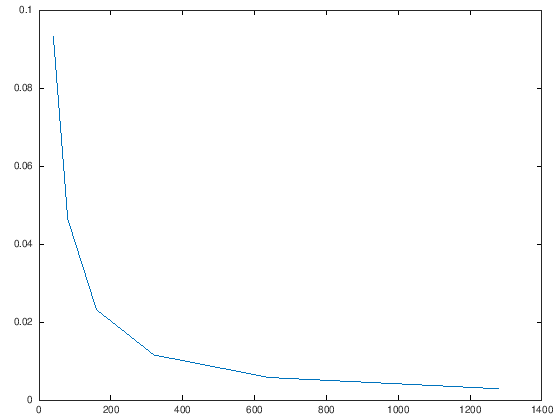

In [31]:
plot(n,abs(err))

The leading order term in error is $h^{2}$, we can see this from yhe eurler maclauring formula (f is now multplied by h since we are approximating our quadrature with a multiplication by that factor)

\begin{eqnarray}
\int_{a}^{b} f(x) dx = T_{f}(n) - \frac{h^{2}}{12} \left[ f'(b)-f'(a) \right]+ \frac{h^{4}}{740} \left[ f'''(b)-f'''(a) \right] + O(6) \\
=  T_{f}(n)- \sum_{k=1}^{\infty} \frac{B_{2k}h^{2 k}}{2k!} f^{2k-1}(b)-f^{2k-1}(a)
\end{eqnarray}

So our leading error is $h^{2}$ unless we are lucky enough that $f'(a)-f'(b)=0$

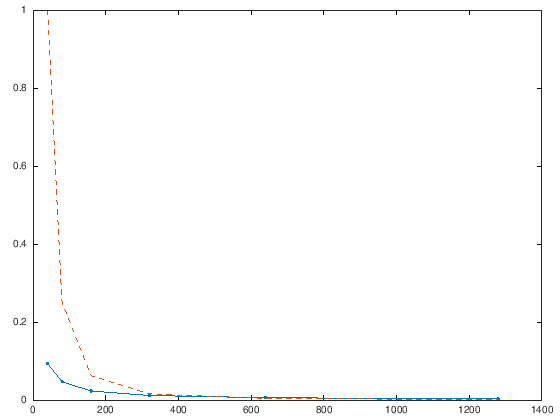

In [32]:
plot(n,abs(err),'.-')
hold on,plot(n,(n/n(1)).^(-2),'--')

# Extrapolation

Sometimes evaluating the function may be computationally expensive, we want to get as accurate as we can with the less number of node evaluations for that we may use a higher order formula.

Since we know the structure of the error we may use extrapolation to improve accuracy. Supose some quantity A_{0} is approximated by an algorithm A(h) with error expansion:

$=A_{0}=A_{h}+c_{1}h+c_{2}*h^2+....$

Then applying the trapezoid formula would yield:

$I=T_{f}(n)+c_{2}h^{2}+c_{4}h^{4}+ ...$

IF we rewrite this expansion as n=O(h^{-1}) then 


$I=T_{f}(n)+c_{2}n^{-2}+c_{4}n^{-4}+ ...$

If we then double the number of steps

$I=T_{f}(2 n)+c_{2}(2n)^{-2}+c_{4}(2n)^{-4}+ ...$

Then we may come out with a linear combination that cancels the second order error. Specifically we may use:

$S_{f}(2n)=\frac{1}{3} \left[ 4 T_{f}(2n) -T_{f}(n)\right]$

Then we may write 

$I=S_{f}(2n)+O(n^{-4})$

This formula is known as Simpson's rule for integration

**Task** This formula can be derived without using extrapolation, you can derive it with the interpolant

$p(x) = \beta + \frac{\gamma-\alpha}{2h}\, x + \frac{\alpha-2\beta+\gamma}{2h^2}\, x^2$

Using this, derive Simpson's Rule

One may also use extrapolation again, by doubling the nodes one obtains what is known as Romberg's rule for integration which is given by

$R_f(4n) = \frac{1}{15} \Bigl[ 16 S_f(4n) - S_f(2n) \Bigr],$

$\int_{0}^{2} x^{2} e^{-2 x}$

In [40]:
f=@(x) x.^2 .* exp(-2*x);
a=0;
b=2;
I=integral(f,a,b,'abstol',1e-14,'reltol',1e-14)

I =    1.904741736116139e-01


#### Trapezoid

In [41]:
N=20;
h=(b-a)/N;
t=h*(0:N)';
y=f(t);

In [42]:
T=h*(sum(y(2:N))+0.5*(y(1)+y(N+1)));

In [43]:
I-T

ans =    6.272367234608223e-05


We now double n

In [44]:
n=2*N;
h=h/2;
t=h*(0:n)';
T(2)=T(1)/2+h*sum(f(t(2:2:n)));
err=I-T

err =

   6.272367234608223e-05   1.536775210217445e-05



In [45]:
err(1)/err(2)

ans =  4.081512502873285


In [46]:
n=2*n;
h=h/2;
t=h*(0:n)';
T(3)=T(2)/2 + h*sum(f(t(2:2:n)));
err=I-T

err =

   6.272367234608223e-05   1.536775210217445e-05   3.822306969630818e-06



#### Simpson's rule

In [47]:
S=(4*T(2:3)-T(1:2))/3;
I-S

ans =

  -4.175546458040635e-07  -2.617474120780727e-08



#### Romberg rule:

In [48]:
R=(16*S(2)-S(1))/15;
I-R

ans =   -8.274758656057202e-11
